In [1]:
import random
import sys
sys.path.append("../../../")
from simulation_classes.eta.car import Cars
from simulation_classes.eta.CWPTable import CWPTable
from simulation_classes.eta.SimulationClass import ETASimulation
sys.path.append("../")
from utils import find_delta_v_list, find_delta_x_list

""" 初期設定（独立変数群）"""
CAR_NUM = 15 #時間窓内の車の総数
START_TIME = 0
TOTAL_LENGTH = 2000 # 入り口から出口までの距離 [m]
WAYPOINTS_NUM = 10 #constrained way pointの数
ORIFITH_LENGTH = 5 # 整流区間長さ. 最後のCWPのindexで指定。
MEAN_SPEED = 20 # 秒速[m/s]として定義
SCALE_FACTOR = 20 #シミュレーション上で距離を変換するための係数
TIME_STEP = 1
TOTAL_TIME = 100
V_MAX = 40

# ETAに関する設定
GLOBAL_TIME_WINDOW = 100  # Strategic Phaseでの時間幅
BATCH_NUM = 1
WINDOW_SIZE = (GLOBAL_TIME_WINDOW / BATCH_NUM)
DESIRED_TTC = 5 # 目標とする車間時間 [s]
DESIRED_SPEED = 21 # 目標とする出口速度 [m/s]

# 車のパラメータ
MAX_ACC_REAL_WORLD = 2 # 0.2Gくらい
MIN_ACC_REAL_WORLD = 2 # 0.5Gくらい
FRONT_BRAKE_REAL_WORLD = 8 # 0.8Gくらい

helly_params = {
    "max_accel":  MAX_ACC_REAL_WORLD,
    "min_accel": 2,
    "front_car_brake":FRONT_BRAKE_REAL_WORLD / SCALE_FACTOR,
    "rear_brake_acc":2,
    "response_time":0.5, #秒で入れる,
    "lambda_1": 0.2,
    "lambda_2": 0.4,
    "d": 0.499,
    "T_des": 1.1,
    "isRss":False
  }

simulation_params = {"TOTAL_TIME": TOTAL_TIME, "TIME_STEP":TIME_STEP}
group_id = 0

WAYPOINTS = [{"waypoint_idx": i, "x": TOTAL_LENGTH / WAYPOINTS_NUM * (i)} for i in range(WAYPOINTS_NUM+1)]


In [2]:
arrival_times = [9.366124143662569, 67.84083963498408, 68.0964930439756, 70.55506478443036, 99.60845989528295]
paramSet = {'algorithm':'CONTROLLED', 'window': 100, 'car_num': 5, 'TTC': 1}
CARS = [Cars(arrival_time=time, index=index, mean_speed=MEAN_SPEED, \
      helly_params=helly_params, group_id=group_id, order_in_group=index)
      for index, time in enumerate(arrival_times)]
global_params = {"WINDOW_SIZE":WINDOW_SIZE, "START_TIME":START_TIME, "DESIRED_TTC":paramSet["TTC"], \
                 "ORIFITH_EXIT_INDEX":ORIFITH_LENGTH, "DESIRED_SPEED": DESIRED_SPEED, "V_MAX":V_MAX}


cwp_table_controlled = CWPTable(waypoints = WAYPOINTS, algorithm = "CONTROLLED", \
             global_params = global_params)

# 続いてシミュレーションオブジェクトを初期化
eta_simulation_controlled = ETASimulation(CARS=CARS, CWPTable=cwp_table_controlled, simulation_params=simulation_params)

# 実行
eta_simulation_controlled.conduct_simulation()

理想到着時刻: {'ideal_arrive_time': 47.61904761904762, 'ideal_speed': 21}
params: {'v_0': 20, 'v_lim': 40, 'v_exit': 21, 'a_max': 2, 'a_dec': 2, 't_0': 9.366124143662569, 't_end': 47.61904761904762, 'length': 1000.0}
{'is_possible': True, 'Reason': 'OK'}
profile= [{'ACC': 2, 'duration': 3.31103515625, 'initial_speed': 20}, {'ACC': 0, 'duration': 32.13085316288505, 'initial_speed': 26.6220703125}, {'ACC': -2, 'duration': 2.81103515625, 'initial_speed': 26.6220703125}]
理想到着時刻: {'ideal_arrive_time': 48.642516858819725, 'ideal_speed': 21}
params: {'v_0': 20, 'v_lim': 40, 'v_exit': 21, 'a_max': 2, 'a_dec': 2, 't_0': 67.84083963498408, 't_end': 48.642516858819725, 'length': 1000.0}
{'is_possible': False, 'Reason': 'Time limit'}
profile= [{'ACC': 2, 'duration': 10.0, 'initial_speed': 20}, {'ACC': 0, 'duration': 31.690625, 'initial_speed': 40}, {'ACC': -2, 'duration': 9.5, 'initial_speed': 40}]
理想到着時刻: {'ideal_arrive_time': 96.34083963498408, 'ideal_speed': 21}
params: {'v_0': 20, 'v_lim': 40, 'v_ex

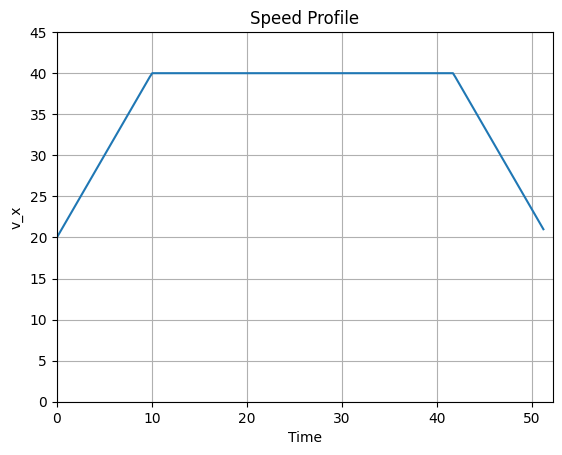

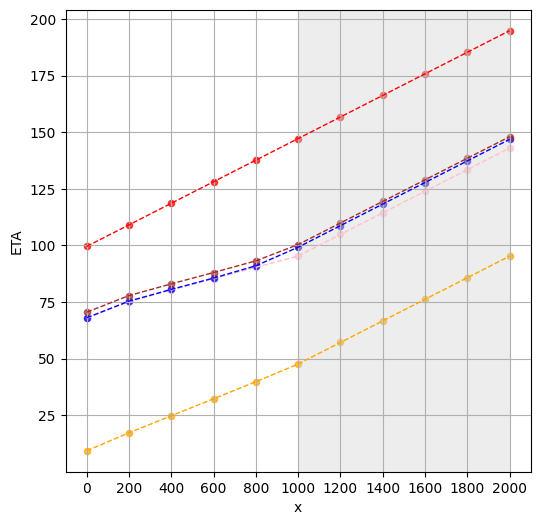

In [4]:
cwp_table_controlled = eta_simulation_controlled.cwp_table
cars = eta_simulation_controlled.CARS
car = cars[1].plot_speed_profile()
cwp_table_controlled.plot()
